In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import numpy as np

In [18]:
df = pd.read_csv("data/final/viviendas_2011_2024.csv")

In [19]:
df

,Ano,Distrito,Esperanza_vida,Renta_neta_persona,Renta_neta_hogar,Renta_bruta_persona,Renta_bruta_hogar,Edad_media,Mayores_65anos%,Menores_18anos%,...,Terraza,Planta,Exterior,Ascensor,Ano_construccion,Ano_reforma,Tipo_vivienda,Banos,Precio_predicho,Precio_ajustado
0,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,0.0,False,False,NaN,NaN,apartamento,1,341.813975,307.632578
1,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,5.0,True,True,NaN,NaN,apartamento,1,823.630189,741.267170
2,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,3.0,True,True,1910.0,NaN,apartamento,2,1544.194900,1389.775410
3,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,4.0,True,True,NaN,NaN,apartamento,1,4780.891753,4302.802577
4,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,3.0,True,True,1940.0,NaN,apartamento,1,2609.403419,2348.463077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209211,2024,BARAJAS,88.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,0.0,True,True,NaN,NaN,apartamento,1,72740.469435,58192.375548
209212,2024,BARAJAS,88.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,False,False,NaN,NaN,apartamento,1,95085.580961,76068.464769
209213,2024,BARAJAS,88.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,2.0,False,False,NaN,NaN,apartamento,1,53811.646997,43049.317597
209214,2024,BARAJAS,88.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,1.0,True,False,NaN,NaN,apartamento,1,155600.761415,124480.609132


In [20]:
# Ver primeras filas
df.head()
#  tipos de datos y valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209216 entries, 0 to 209215
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Ano                       209216 non-null  int64  
 1   Distrito                  209216 non-null  object 
 2   Esperanza_vida            209216 non-null  float64
 3   Renta_neta_persona        119552 non-null  float64
 4   Renta_neta_hogar          119552 non-null  float64
 5   Renta_bruta_persona       119552 non-null  float64
 6   Renta_bruta_hogar         119552 non-null  float64
 7   Edad_media                119552 non-null  float64
 8   Mayores_65anos%           119552 non-null  float64
 9   Menores_18anos%           119552 non-null  float64
 10  Tamano_vivienda_personas  119552 non-null  float64
 11  Paro_registrado%          119552 non-null  float64
 12  Apartamentos_turisticos   149440 non-null  float64
 13  Superficie_distrito_ha    209216 non-null  f

Ano                              0
Distrito                         0
Esperanza_vida                   0
Renta_neta_persona           89664
Renta_neta_hogar             89664
Renta_bruta_persona          89664
Renta_bruta_hogar            89664
Edad_media                   89664
Mayores_65anos%              89664
Menores_18anos%              89664
Tamano_vivienda_personas     89664
Paro_registrado%             89664
Apartamentos_turisticos      59776
Superficie_distrito_ha           0
Densidad_poblacion           89664
Zonas_verdes%                    0
Habitaciones                     0
Operacion                        0
Tamano                           0
Garaje                           0
Trastero                         0
Piscina                          0
Terraza                          0
Planta                       19082
Exterior                         0
Ascensor                         0
Ano_construccion            204582
Ano_reforma                 208362
Tipo_vivienda       

Preparar datos

In [22]:
# =========================
# 1. Preparar datos
# =========================
cat_vars = ["Tipo_vivienda", "Operacion", "Garaje", "Trastero", "Piscina", "Terraza", "Exterior", "Ascensor"]
num_vars = ["Tamano", "Habitaciones", "Banos", "Planta", "Precio_ajustado"]

Imputar variables numéricas con la media:

In [23]:
df[num_vars] = df[num_vars].fillna(df[num_vars].mean())

Imputar variables categóricas con la categoría más frecuente:

In [25]:
for col in cat_vars:
    df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
# Convertir categorías a índices
for col in cat_vars:
    df[col] = df[col].astype("category").cat.codes

In [27]:
print(df[num_vars].isna().sum())
print(df[cat_vars].isna().sum())

Tamano             0
Habitaciones       0
Banos              0
Planta             0
Precio_ajustado    0
dtype: int64
Tipo_vivienda    0
Operacion        0
Garaje           0
Trastero         0
Piscina          0
Terraza          0
Exterior         0
Ascensor         0
dtype: int64


In [28]:
# Escalar numéricas
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])


In [29]:
# Variables finales
X_num = df[num_vars].values
X_cat = df[cat_vars].values
y = df["Precio_ajustado"].values  # target para aprender embeddings

In [30]:
# Split train/test
X_num_train, X_num_test, X_cat_train, X_cat_test, y_train, y_test = train_test_split(
    X_num, X_cat, y, test_size=0.2, random_state=42
)

In [31]:
# =========================
# 2. Modelo con embeddings
# =========================
class EntityEmbeddingModel(nn.Module):
    def __init__(self, cat_dims, num_dim):
        super().__init__()
        # Embeddings para cada variable categórica
        self.embeddings = nn.ModuleList([
            nn.Embedding(categories, min(50, (categories+1)//2))  # dimensión de embedding
            for categories in cat_dims
        ])
        # Capa para numéricas
        self.num_layer = nn.Linear(num_dim, 16)
        # Capa final
        total_emb_dim = sum([e.embedding_dim for e in self.embeddings])
        self.fc = nn.Sequential(
            nn.Linear(total_emb_dim + 16, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
    def forward(self, x_num, x_cat):
        emb_list = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        emb_cat = torch.cat(emb_list, dim=1)
        emb_num = self.num_layer(x_num)
        emb_all = torch.cat([emb_cat, emb_num], dim=1)  # embedding conjunto
        return self.fc(emb_all), emb_all

# Dimensiones categóricas
cat_dims = [int(df[col].nunique()) for col in cat_vars]
model = EntityEmbeddingModel(cat_dims, len(num_vars))



In [32]:
# =========================
# 3. Entrenamiento
# =========================
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_num_train_t = torch.FloatTensor(X_num_train)
X_cat_train_t = torch.LongTensor(X_cat_train)
y_train_t = torch.FloatTensor(y_train).view(-1,1)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    outputs, _ = model(X_num_train_t, X_cat_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.2f}")



Epoch 0, Loss: 1.35
Epoch 10, Loss: 0.05
Epoch 20, Loss: 0.04
Epoch 30, Loss: 0.01
Epoch 40, Loss: 0.00


In [33]:
# =========================
# 4. Extraer embeddings
# =========================
model.eval()
X_num_full = torch.FloatTensor(X_num)
X_cat_full = torch.LongTensor(X_cat)

with torch.no_grad():
    _, X_embeddings = model(X_num_full, X_cat_full)



clustering kmeans

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

# X_emb = tu embedding final de Entity Embeddings (sin NaN)
X_emb = X_embeddings.numpy()

# ==========================
# 1. Muestreo del 20%
# ==========================
sample_size = int(0.2 * len(X_emb))  # 20% del dataset
idx_sample = np.random.choice(len(X_emb), sample_size, replace=False)
X_sample = X_emb[idx_sample]
distrito_sample = df["Distrito"].iloc[idx_sample]

In [38]:
# ==========================
# 2. Evaluación para k = 2 a 21
# ==========================
sil_scores, ari_scores, nmi_scores = [], [], []
k_values = range(2, 22)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters_sample = kmeans.fit_predict(X_sample)
    
    # Silhouette en la muestra
    sil = silhouette_score(X_sample, clusters_sample)
    ari = adjusted_rand_score(distrito_sample, clusters_sample)
    nmi = normalized_mutual_info_score(distrito_sample, clusters_sample)
    
    sil_scores.append(sil)
    ari_scores.append(ari)
    nmi_scores.append(nmi)

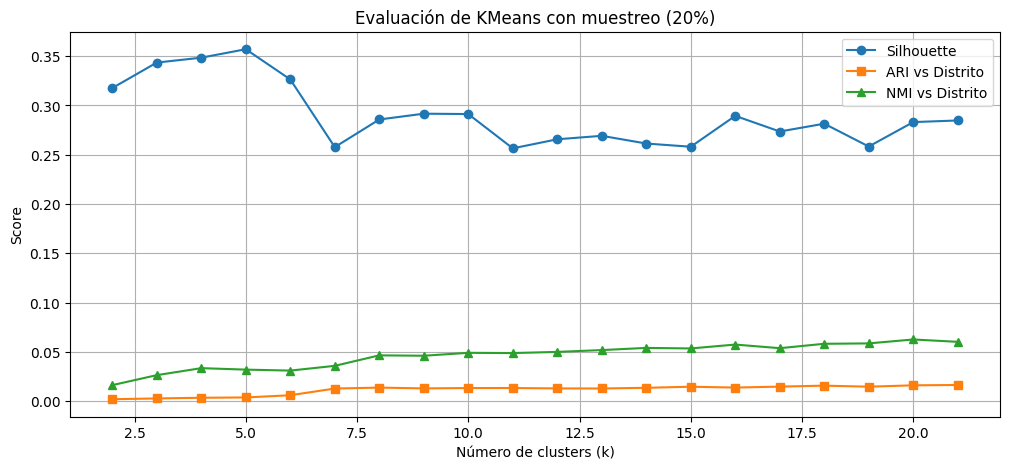

In [39]:
# ==========================
# 3. Graficamos resultados
# ==========================
plt.figure(figsize=(12,5))
plt.plot(k_values, sil_scores, marker='o', label="Silhouette")
plt.plot(k_values, ari_scores, marker='s', label="ARI vs Distrito")
plt.plot(k_values, nmi_scores, marker='^', label="NMI vs Distrito")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Score")
plt.title("Evaluación de KMeans con muestreo (20%)")
plt.legend()
plt.grid()
plt.show()

In [40]:
# ==========================
# 4. Mejor k según Silhouette
# ==========================
best_k = k_values[sil_scores.index(max(sil_scores))]
print(f"Mejor k según Silhouette (con muestreo): {best_k}")

Mejor k según Silhouette (con muestreo): 5


In [41]:
ari

0.016543099350596724

In [43]:
X = X_emb  

In [44]:
# ============================
# 1. KMEANS
# ============================
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

In [46]:
!pip install hdbscan umap-learn

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/726.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/726.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 726.2/726.2 kB 958.8 kB/s  0:00:00

   ---------------------------------------- 0/3 [pynndescent]
   ------------- -------------------------- 1/3 [hdbscan]
   ------------- -------------------------- 1/3 [hdbscan]
   ------------- -------------------------- 1/3 [hdbscan]
   -------------------------- ------------- 2/3 [umap-learn]
   -------------------------- ------------- 2/3 [umap-learn]
   ---------------------------------------- 3/3 [umap-learn]



In [47]:
import numpy as np
import pandas as pd
import umap
import hdbscan
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\sammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
# ============================
# 1. UMAP para reducir dimensión
# ============================
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=10, random_state=42)
X_umap = umap_model.fit_transform(X_emb)  

c:\Users\sammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [49]:
# ============================
# 2. HDBSCAN
# ============================
hdb = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=50)
clusters_hdb = hdb.fit_predict(X_umap)


c:\Users\sammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\sammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [50]:
# ============================
# 3. GMM
# ============================
gmm = GaussianMixture(n_components=best_k, random_state=42)
clusters_gmm = gmm.fit_predict(X)

In [51]:
# ============================
# 4. Función para métricas
# ============================
def evaluar_clusters(X, labels, name):
    sil = silhouette_score(X, labels) if len(set(labels)) > 1 else np.nan
    ari = adjusted_rand_score(df["Distrito"], labels)
    nmi = normalized_mutual_info_score(df["Distrito"], labels)
    print(f"\n{name}: Silhouette={sil:.3f}, ARI={ari:.3f}, NMI={nmi:.3f}")
    return sil, ari, nmi

# Evaluamos los tres
res_kmeans = evaluar_clusters(X, clusters_kmeans, "KMeans")
res_hdb = evaluar_clusters(X_umap, clusters_hdb, "HDBSCAN")
res_gmm = evaluar_clusters(X, clusters_gmm, "GMM")



KMeans: Silhouette=0.356, ARI=0.004, NMI=0.032

HDBSCAN: Silhouette=-0.075, ARI=0.002, NMI=0.086

GMM: Silhouette=0.169, ARI=0.008, NMI=0.027


In [56]:
df["Cluster_KMeans"] = clusters_kmeans
df["Cluster_GMM"] = clusters_gmm
df["Cluster_HDBSCAN"] = clusters_hdb

Analisis de clusters:

Resumen de precios por cluster → media, mediana.

Proporción de tipos de vivienda por cluster.

Porcentaje de viviendas pequeñas (<40 m²) por cluster.

Distribución de clusters por distrito → para ver si se parecen a los distritos reales.

Gráficas de precios y tipos de vivienda por cluster.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============
# 1. Precio medio y mediano por cluster
# ============
def resumen_precio(df, cluster_col):
    resumen = df.groupby(cluster_col).agg({
        "Precio_predicho": ["mean", "median"],
        "Tamano": "mean",
        "Habitaciones": "mean"
    }).round(1)
    print(f"\nResumen precios por {cluster_col}:")
    print(resumen)
    return resumen

res_kmeans = resumen_precio(df, "Cluster_KMeans")
res_gmm = resumen_precio(df, "Cluster_GMM")
res_hdb = resumen_precio(df, "Cluster_HDBSCAN")




Resumen precios por Cluster_KMeans:
               Precio_predicho             Tamano Habitaciones
                          mean      median   mean         mean
Cluster_KMeans                                                
0                    3031506.0   2309169.9    2.7          2.1
1                     315097.2    169052.2    0.1          0.4
2                   32602948.2  25143633.2    9.6          3.6
3                       1384.2       807.3   -0.3         -0.4
4                     317804.5    179554.4   -0.2         -0.0

Resumen precios por Cluster_GMM:
            Precio_predicho            Tamano Habitaciones
                       mean     median   mean         mean
Cluster_GMM                                               
0                 4243793.8  1656561.5    2.8          1.7
1                    1463.0      812.7   -0.3         -0.4
2                    1704.2     1261.2   -0.1          0.0
3                  222338.5   137675.4   -0.3         -0.1
4           

In [58]:
# ============
# 2. Proporción de tipos de vivienda por cluster
# ============
def tipo_vivienda_pct(df, cluster_col):
    tipo_pct = pd.crosstab(df["Tipo_vivienda"], df[cluster_col], normalize="columns") * 100
    print(f"\nProporción tipos de vivienda por {cluster_col}:")
    print(tipo_pct.round(1))
    return tipo_pct

tipo_kmeans = tipo_vivienda_pct(df, "Cluster_KMeans")
tipo_gmm = tipo_vivienda_pct(df, "Cluster_GMM")
tipo_hdb = tipo_vivienda_pct(df, "Cluster_HDBSCAN")




Proporción tipos de vivienda por Cluster_KMeans:
Cluster_KMeans     0     1     2     3     4
Tipo_vivienda                               
0               56.8  88.6  63.3  90.8  89.3
1               32.1   2.6  26.6   0.6   0.6
2                4.5   3.0   8.0   2.3   2.8
3                1.2   1.0   0.0   1.5   2.2
4                0.1   0.3   0.0   0.6   0.7
5                0.0   0.0   0.0   0.0   0.0
6                0.2   0.0   0.0   0.1   0.1
7                5.0   4.6   2.0   4.1   4.2

Proporción tipos de vivienda por Cluster_GMM:
Cluster_GMM       0     1     2     3     4
Tipo_vivienda                              
0              41.0  93.3  73.1  78.7  95.5
1              29.2   0.0   0.0   0.0   4.5
2              12.7   2.4   2.5   5.8   0.0
3               2.7   0.0  14.2   4.9   0.0
4               0.0   0.0   5.9   1.5   0.0
5               0.0   0.0   0.0   0.0   0.0
6               0.2   0.0   0.5   0.2   0.0
7              14.2   4.3   3.6   8.8   0.0

Proporción t

In [59]:
# ============
# 3. Distribución de clusters por distrito
# ============
def distribucion_distrito(df, cluster_col):
    dist_cluster = pd.crosstab(df["Distrito"], df[cluster_col], normalize="index") * 100
    print(f"\nDistribución de {cluster_col} por distrito (%):")
    print(dist_cluster.round(1))
    return dist_cluster

dist_kmeans = distribucion_distrito(df, "Cluster_KMeans")
dist_gmm = distribucion_distrito(df, "Cluster_GMM")
dist_hdb = distribucion_distrito(df, "Cluster_HDBSCAN")




Distribución de Cluster_KMeans por distrito (%):
Cluster_KMeans        0     1    2     3     4
Distrito                                      
ARGANZUELA          0.2   8.0  0.0  48.7  43.2
BARAJAS             5.4   6.0  0.0  42.3  46.3
CARABANCHEL         1.2   3.9  0.0  20.1  74.8
CENTRO              3.9   3.6  0.0  41.6  50.9
CHAMARTIN          10.3   7.7  0.6  44.8  36.6
CHAMBERI            6.3   7.3  0.3  42.7  43.4
CIUDADLINEAL        3.7   6.6  0.1  30.9  58.7
FUENCARRALELPARDO   9.8   9.3  0.0  32.9  48.0
HORTALEZA          12.8  11.7  0.7  38.0  36.8
LATINA              0.3   3.9  0.0  27.6  68.1
MONCLOAARAVACA     18.5   7.2  0.4  39.7  34.1
MORATALAZ           0.0   9.0  0.0  15.4  75.6
PUENTEDEVALLECAS    0.1   5.1  0.0  17.2  77.6
RETIRO              4.6   9.2  0.2  40.6  45.5
SALAMANCA           8.2   8.4  0.2  41.6  41.6
SANBLASCANILLEJAS   7.0   6.8  0.2  19.7  66.3
TETUAN              3.5   5.2  0.1  44.1  47.1
USERA               0.1   9.5  0.0  17.3  73.0
VICALVARO 

In [60]:
# ============
# 4. Porcentaje de viviendas pequeñas (<40 m2) por cluster
# ============
df["vivienda_pequena"] = (df["Tamano"] < 40).astype(int)
def viviendas_pequenas(df, cluster_col):
    pct_peq = df.groupby(cluster_col)["vivienda_pequena"].mean() * 100
    print(f"\nPorcentaje viviendas pequeñas por {cluster_col}:")
    print(pct_peq.round(1))
    return pct_peq

peq_kmeans = viviendas_pequenas(df, "Cluster_KMeans")
peq_gmm = viviendas_pequenas(df, "Cluster_GMM")
peq_hdb = viviendas_pequenas(df, "Cluster_HDBSCAN")




Porcentaje viviendas pequeñas por Cluster_KMeans:
Cluster_KMeans
0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: vivienda_pequena, dtype: float64

Porcentaje viviendas pequeñas por Cluster_GMM:
Cluster_GMM
0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: vivienda_pequena, dtype: float64

Porcentaje viviendas pequeñas por Cluster_HDBSCAN:
Cluster_HDBSCAN
-1      100.0
 0      100.0
 1      100.0
 2      100.0
 3      100.0
        ...  
 193    100.0
 194    100.0
 195    100.0
 196    100.0
 197    100.0
Name: vivienda_pequena, Length: 199, dtype: float64


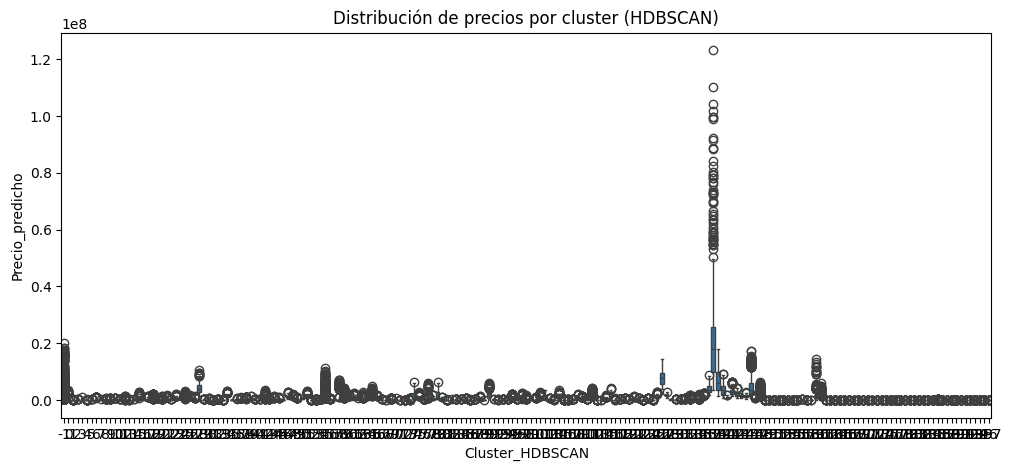

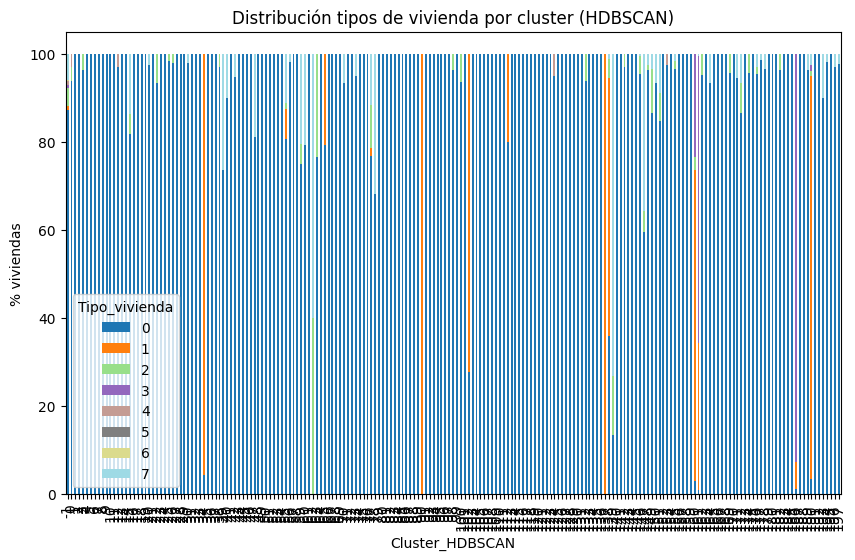

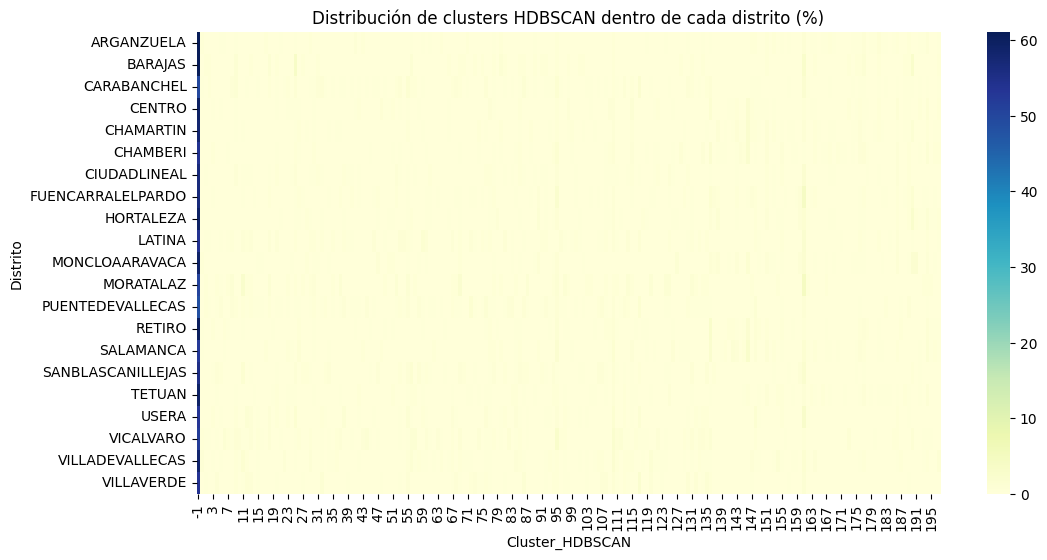

In [61]:
# ============
# 5. Gráficas comparativas
# ============

# Boxplot de precios
plt.figure(figsize=(12,5))
sns.boxplot(x="Cluster_HDBSCAN", y="Precio_predicho", data=df)
plt.title("Distribución de precios por cluster (HDBSCAN)")
plt.show()

# Tipos de vivienda apilados por cluster HDBSCAN
tipo_hdb.T.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Distribución tipos de vivienda por cluster (HDBSCAN)")
plt.ylabel("% viviendas")
plt.show()

# Heatmap de distribución de clusters por distrito (HDBSCAN)
plt.figure(figsize=(12,6))
sns.heatmap(dist_hdb, cmap="YlGnBu", annot=False)
plt.title("Distribución de clusters HDBSCAN dentro de cada distrito (%)")
plt.show()
